<div style="align: center; margin: 0; padding: 0; height: 250px;">
    <br>
    <img src="https://images.ctfassets.net/p6ae3zqfb1e3/3pQAQO2G3wrOcyuCXFbAJd/01f1309dda5327d03a76a051f98f44ac/Citi_Bike_Homepage_Hero_3x__1_.jpg" style="display:block; margin:auto; width:65%; height:100%;">
</div><br><br>

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>Citi Bike Trip History Data</strong></p>  
  
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:22px; font-weight:normal; text-transform: capitalize; padding: 5px;"
     >Machine Learning Module: Ride Duration Prediction using Regression Analysis<br>(EDA and Linear Regression Model Training)</p>    
</div>

**Dataset Info**

> https://citibikenyc.com/system-data

**System Data**

Where do Citi Bikers ride? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on? We've heard all of these questions and more from you, and we're happy to provide the data to help you discover the answers to these questions and more. We invite developers, engineers, statisticians, artists, academics and other interested members of the public to use the data we provide for analysis, development, visualization and whatever else moves you.

This data is provided according to the [NYCBS Data Use Policy](https://www.citibikenyc.com/data-sharing-policy).


**Citi Bike Trip Histories**

We publish [downloadable files of Citi Bike trip data](https://s3.amazonaws.com/tripdata/index.html). The data includes:

- Ride ID
- Rideable type
- Started at
- Ended at
- Start station name
- Start station ID
- End station name
- End station ID
- Start latitude
- Start longitude
- End latitude
- End Longitude
- Member or casual ride

Data format previously:

- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations (which we were using more in June and July 2013), and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it's secure).

[Download Citi Bike trip history data](https://s3.amazonaws.com/tripdata/index.html)

**Monthly Operating Reports**

View the [monthly operating reports](https://www.citibikenyc.com/system-data/operating-reports) that we provide to the NYC Department of Transportation.

**Additional Resources**

- The City of New York's [bicycling data](http://www.nyc.gov/html/dot/html/about/datafeeds.shtml#Bikes)
- A group of software developers and data explorers working with data feeds from NYC's Bike Share system and other bike data maintain this [Google Group](https://groups.google.com/forum/#!aboutgroup/citibike-hackers) (note: Citi Bike is not responsible for this group – it is run and maintained by a group of interested private citizens)

**TASK**

The goal of this project is to apply everything we learned in this course and build an end-to-end machine learning project.

Remember that to pass the project, you must evaluate 3 peers. If you don't do that, your project can't be considered compelete.

Submitting

Project Cohort #2

Project:

- Form: https://forms.gle/o1s3NmYE4UmFSMVD7
- Deadline: 21 August (Monday), 23:00 CEST

Peer reviewing:

- Peer review assignments: TBA ("project 2" tab)
- Form: TBA
-  Deadline: TBA

Project feedback: TBA ("feedback-02" tab)

Evaluation criteria
See [here](https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/07-project/README.md)

Questions: https://github.com/DataTalksClub/mlops-zoomcamp/tree/main/cohorts/2023/07-project

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

> ⚠️ Not Recommended conda `base` env, work on `venv`

- https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf

```
pip freeze > requirements.txt
conda list -e > requirements.txt

# new conda virtual environment
conda create --name "lin-reg" python=3.10 jupyter -y
conda activate "lin-reg"

# install all package dependencies
pip install -r requirements.txt
conda install -c conda-forge --file=requirements.txt      # mostly not work
conda install -c conda-forge pandas==2.0.2 -q -y

# if The environment is inconsistent, try below
conda update -n base -c defaults conda --force-reinstall
conda install anaconda --force-reinstall

```

**You must use the `--no-deps` option in the pip install command in order to avoid bundling dependencies into your conda-package.**

If you run pip install without the `--no-deps` option, pip will often install dependencies in your conda recipe and those dependencies will become part of your package. This wastes space in the package and `increases the risk of file overlap`, file clobbering, and broken packages.

There might be cases where you want to install a package directly from a local directory or a specific location, without relying on the package indexes. In such situations, you can use the `--no-index` option to tell pip not to look for the package in any indexes.

```
- command1 & command2  # runs simultaneously
- command1 ; command2  # runs sequentially
- command1 && command2 # runs sequentially, runs command2 only if command1 succeeds
- command1 || command2 # runs sequentially, runs command2 only if command1 fails
```

In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.sparse import hstack
from scipy.stats import stats

from sklearn.feature_extraction import DictVectorizer
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report

import xgboost as xgb
import optuna
from optuna.samplers import TPESampler
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

import os
import sys
import pickle
import zipfile
# import boto3
# import click
# import pathlib
# import argparse
# import requests
# import urllib.request
from glob import glob
# from tqdm import tqdm           # console-based
# from tqdm.notebook import tqdm  # jupyter-based
from tqdm.auto import tqdm        # automatically selects
# tqdm._instances.clear()
# Import joblib for model persistence
from joblib import load, dump

import mlflow
import wandb

import prefect
from prefect import task, flow, Flow
from prefect.tasks import task_input_hash
from prefect.artifacts import create_markdown_artifact

# memory management performs garbage collection 
import gc
gc.collect()

1131

In [2]:
# from mlflow.tracking import MlflowClient
# from mlflow.exceptions import MlflowException
import mlflow; print("mlflow.__version__: ", mlflow.__version__)
import wandb;  print("wandb.__version__ : ", wandb.__version__)

mlflow.__version__:  2.5.0
wandb.__version__ :  0.15.8


In [3]:
!prefect version

Version:             2.11.3
API version:         0.8.4
Python version:      3.10.12
Git commit:          3a400865
Built:               Thu, Aug 3, 2023 3:24 PM
OS/Arch:             win32/AMD64
Profile:             default
Server type:         ephemeral
Server:
  Database:          sqlite
  SQLite version:    3.41.2


In [28]:
import warnings
from numba import NumbaDeprecationWarning
# Suppress NumbaDeprecationWarning in umap.distances module
warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)

import os
# TensorFlow to only display error messages 
# and suppress warnings and informational messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Import Evidently for data drift and model performance monitoring
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metrics import ColumnDriftMetric, DatasetDriftMetric
from evidently.metrics import DatasetMissingValuesMetric, ColumnQuantileMetric

In [4]:
# !pip install session_info
import session_info
session_info.show(html=False)

-----
evidently           0.4.0
hyperopt            0.2.7
matplotlib          3.7.1
mlflow              2.5.0
numpy               1.24.4
optuna              3.3.0
pandas              2.0.3
prefect             2.11.3
scipy               1.10.1
seaborn             0.12.2
session_info        1.0.0
sklearn             1.2.2
tqdm                4.65.0
wandb               0.15.8
xgboost             1.7.6
-----
IPython             8.12.0
jupyter_client      7.4.9
jupyter_core        5.3.0
jupyterlab          3.6.3
notebook            6.5.4
-----
Python 3.10.12 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 19:09:20) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22621-SP0
-----
Session information updated at 2023-08-22 00:23


In [5]:
# !pip install pipenv
# !pipenv install scikit-learn==1.2.2 pandas pyarrow s3fs requests

In [11]:
import os
# Get the current working directory
# current_dir = os.getcwd()

# Create a new directory for storing data
os.makedirs('./pycode', exist_ok=True)
os.makedirs('./config', exist_ok=True)
# os.makedirs('./data', exist_ok=True)
# os.makedirs('./output', exist_ok=True)
# os.makedirs('./model', exist_ok=True)

In [12]:
glob('data/*.*')

['data\\JC-202203-citibike-tripdata.csv',
 'data\\JC-202305-citibike-tripdata.csv',
 'data\\JC-202305-citibike-tripdata.csv.zip',
 'data\\JC-202306-citibike-tripdata.csv',
 'data\\JC-202306-citibike-tripdata.csv.zip',
 'data\\JC-202307-citibike-tripdata.csv',
 'data\\JC-202307-citibike-tripdata.csv.zip']

# Docker Compose Configuration File

A Docker Compose file is used to define and manage a multi-container Docker application. It's a YAML file that contains all the necessary configurations to run the application. The services defined in this file are typically used in a development environment for testing or in a production environment for deployment.

## Create a Docker Compose File

- In your project directory, create a file named docker-compose.yml

In [13]:
%%writefile docker-compose.yml

# Specifies the Docker Compose file version
version: '3.8'

# Declares volumes that can be used by services in the Docker Compose file
volumes: 
  # Declares a volume named grafana_data
  grafana_data: {}

# Defines networks that can be used by services in the Docker Compose file
networks:
  # Declares a network named front-tier
  front-tier:
  # Declares a network named back-tier
  back-tier:

# Defines the services that make up your app
services:
  # Defines a service named db
  db:
    # Specifies the Docker image to use for this service
    image: postgres
    # Ensures that the service is always restarted if it stops
    restart: always
    # Sets environment variables for the service
    environment:
      # Sets the password for the Postgres database
      POSTGRES_PASSWORD: example
    # Maps ports between the host and the container
    ports:
      - "5432:5432"
    # Specifies the networks that this service is part of
    networks:
      - back-tier

  # Defines a service named adminer
  adminer:
    image: adminer
    restart: always
    ports:
      - "8080:8080"
    networks:
      - back-tier
      - front-tier  

  # Defines a service named grafana
  grafana:
    image: grafana/grafana
    # Sets the user ID under which the service will run
    user: "472"
    ports:
      - "3000:3000"
    # Maps local directories or files to directories inside the container
    volumes:
      # Maps a local file to a file inside the container, and makes it read-only
      - ./config/grafana_datasources.yaml:/etc/grafana/provisioning/datasources/datasource.yaml:ro
      - ./config/grafana_dashboards.yaml:/etc/grafana/provisioning/dashboards/dashboards.yaml:ro
      - ./dashboards:/opt/grafana/dashboards
    networks:
      - back-tier
      - front-tier
    restart: always

Overwriting docker-compose.yml


## Create Grafana Data Source Configuration

- The default username and password for Grafana webpage is admin / admin .

We'll create a Grafana data source configuration file. It's used to define the data sources that Grafana should connect to. A data source in Grafana represents a back-end database, such as PostgreSQL, MySQL, InfluxDB, or a myriad of other data storage systems. In your project directory, create a new directory named config and a file within it named grafana_datasources.yaml:

In [14]:
%%writefile config/grafana_datasources.yaml

# Specifies the version used in this configuration file
apiVersion: 1

# Defines the data sources that Grafana should connect to
# list of datasources to insert/update
# available in the database
datasources:
  # Defines a data source
  - 
    # Specifies the name of the data source
    name: PostgreSQL
    # Specifies the type of the data source
    type: postgres
    # Specifies how Grafana should access the data source
    # The 'proxy' mode means that all requests are proxied via the Grafana backend/server
    access: proxy
    # Specifies the URL (including the port number) of the data source
    url: db.:5432
    # Specifies the name of the database that Grafana should connect to
    database: test
    # Specifies the username that Grafana should use to connect to the database
    user: postgres
    # Specifies secure data like passwords
    secureJsonData:
      # Sets the password for the database connection
      password: 'example'
    # Specifies additional JSON data for the data source configuration
    jsonData:
      # Disables SSL mode for the database connection
      sslmode: 'disable'

Writing config/grafana_datasources.yaml


In [15]:
%%writefile config/grafana_dashboards.yaml

# config file version
apiVersion: 1

providers:
  # <string> an unique provider name. Required
  - name: 'Evidently Dashboards'
    # <int> Org id. Default to 1
    orgId: 1
    # <string> name of the dashboard folder.
    folder: ''
    # <string> folder UID. will be automatically generated if not specified
    folderUid: ''
    # <string> provider type. Default to 'file'
    type: file
    # <bool> disable dashboard deletion
    disableDeletion: false
    # <int> how often Grafana will scan for changed dashboards
    updateIntervalSeconds: 10
    # <bool> allow updating provisioned dashboards from the UI
    allowUiUpdates: false
    options:
      # <string, required> path to dashboard files on disk. Required when using the 'file' type
      path: /opt/grafana/dashboards
      # <bool> use folder names from filesystem to create folders in Grafana
      foldersFromFilesStructure: true

Writing config/grafana_dashboards.yaml


## Build and Run Docker Compose

Finally, we'll build and run our Docker Compose configuration. In your terminal, navigate to the directory containing docker-compose.yml and run:

In [16]:
# starts the containers and rebuilds the images based on the latest changes in the Dockerfiles or build context before starting the containers. 
# Use this when you've made changes to your Docker configuration or code.
# docker-compose up --build

# starts the containers in detached mode without forcing a rebuild of the images.
# It's useful for quickly starting existing containers.
# docker-compose up -d

You should see that all your containers are successfully created. You can verify this by accessing Grafana and Adminer through your browser at:
- [localhost:3000](http://localhost:3000) and 
- [localhost:8080](http://localhost:8080), respectively.

That's it! You've now set up an environment for MLOps using Docker Compose. In the next part, we'll load some data and start implementing monitoring for our service.

Then open NEW terminal activate CONDA enviroment in terminal, navigate to the directory containing docker-compose.yml and run below code stop docker container:

In [17]:
# stop and remove the containers, networks, and other resources defined in your Docker Compose configuration.
# docker-compose down

# If you want to remove the images as well, you can use the --rmi all flag, Keep volumes.
# docker-compose down --rmi all

# remove everything, Removes the associated networks and volumes, Removes all images used by the containers.
# docker-compose down --volumes --rmi all

## evidently_metrics_calculation.py

In [27]:
%%writefile pycode/evidently_metrics_calculation.py

import warnings
from numba import NumbaDeprecationWarning
# Suppress NumbaDeprecationWarning in umap.distances module
warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)

import os
# TensorFlow to only display error messages 
# and suppress warnings and informational messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import datetime
import time
import random
import logging 
import uuid
import pytz
import numpy as np
import pandas as pd
import io
import psycopg
import joblib

from prefect import task, flow

# Import Evidently for data drift and model performance monitoring
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metrics import ColumnDriftMetric, ColumnQuantileMetric
from evidently.metrics import DatasetDriftMetric, DatasetMissingValuesMetric

logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s]: %(message)s")

SEND_TIMEOUT = 10
rand = random.Random()

def haversine_distance(row):
    lat1, lon1, lat2, lon2 = row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']
    # Convert latitude and longitude from degrees to radians
    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(np.radians, [lat1, lon1, lat2, lon2])

    # Radius of the Earth in kilometers
    radius = 6371.0

    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = radius * c
    
    return distance

create_table_statement = """
drop table if exists evidently_metrics_calculation;
create table evidently_metrics_calculation(
	timestamp timestamp,
	prediction_drift float,
	num_drifted_columns integer,
	share_missing_values float,
	column_quantile_values float
);
"""

model_file_path = 'model/enc_lin_reg.bin' 
with open(model_file_path, 'rb') as f_in:
	encoder, model = joblib.load(f_in)	

begin = datetime.datetime(2023, 5, 1, 0, 0)
reference_data = pd.read_parquet('data/reference.parquet')
raw_data = pd.read_csv('data/JC-202305-citibike-tripdata.csv')
# Assuming train_df is your DataFrame containing the coordinates
raw_data['trip_distance'] = raw_data.apply(haversine_distance, axis=1).fillna(0)

# Define the column mapping for the Evidently report
num_features = ['trip_distance']
cat_features = ["start_station_id", "end_station_id"]
raw_data[cat_features] = encoder.transform(raw_data[cat_features])

column_mapping = ColumnMapping(
    prediction='prediction',
    numerical_features=num_features,
    categorical_features=cat_features,
    target=None
)

# Create a list of metrics to include in the report
metrics = [
	ColumnDriftMetric(column_name='prediction'),
	DatasetDriftMetric(),
	DatasetMissingValuesMetric(),    
	# Add the ColumnQuantileMetric for the 'trip_distance' column
	ColumnQuantileMetric(column_name='trip_distance', quantile=0.5)
]

# Create the report with the metrics
report = Report(metrics=metrics)


@task(name="Preprocces Database", log_prints=None)
def prep_db():
	with psycopg.connect("host=localhost port=5432 user=postgres password=example", autocommit=True) as conn:
		res = conn.execute("SELECT 1 FROM pg_database WHERE datname='test'")
		if len(res.fetchall()) == 0:
			conn.execute("create database test;")
		with psycopg.connect("host=localhost port=5432 dbname=test user=postgres password=example") as conn:
			conn.execute(create_table_statement)


@task(name="Calculate Metrics", retries=2, retry_delay_seconds=5, log_prints=None)
def calculate_metrics_postgresql(curr, i):
	raw_data['started_at'] = pd.to_datetime(raw_data['started_at'])
	raw_data['ended_at']  = pd.to_datetime(raw_data['ended_at'])
	current_data = raw_data[
		(raw_data['started_at'] >= (begin + datetime.timedelta(i))) &
		(raw_data['started_at'] <  (begin + datetime.timedelta(i + 1)))
	]
	
	#current_data.fillna(0, inplace=True)
	current_data['prediction'] = model.predict(current_data[num_features + cat_features].fillna(0))

	report.run(
		reference_data = reference_data, 
		current_data = current_data,
		column_mapping=column_mapping
	)
	result = report.as_dict()

	prediction_drift = result['metrics'][0]['result']['drift_score']
	num_drifted_columns = result['metrics'][1]['result']['number_of_drifted_columns']
	share_missing_values = result['metrics'][2]['result']['current']['share_of_missing_values']
	column_quantile_values = result['metrics'][3]['result']['current']['value']

	curr.execute(
		"insert into evidently_metrics_calculation(timestamp, prediction_drift, num_drifted_columns, share_missing_values, column_quantile_values) values (%s, %s, %s, %s, %s)",
		(begin + datetime.timedelta(i), prediction_drift, num_drifted_columns, share_missing_values, column_quantile_values)
	)


@flow(name="Batch Monitoring Backfill", log_prints=None)
def batch_monitoring_backfill():
	prep_db()
	last_send = datetime.datetime.now() - datetime.timedelta(seconds=10)
	with psycopg.connect("host=localhost port=5432 dbname=test user=postgres password=example", autocommit=True) as conn:
		for i in range(0, 27):
			with conn.cursor() as curr:
				calculate_metrics_postgresql(curr, i)

			new_send = datetime.datetime.now()
			seconds_elapsed = (new_send - last_send).total_seconds()
			if seconds_elapsed < SEND_TIMEOUT:
				time.sleep(SEND_TIMEOUT - seconds_elapsed)
			while last_send < new_send:
				last_send = last_send + datetime.timedelta(seconds=10)
			logging.info("data sent")


if __name__ == '__main__':
	batch_monitoring_backfill()

Overwriting pycode/evidently_metrics_calculation.py


so we edit dummy_metrics_calculation.py and evidently_metrics_calculation.py
- start again docker compose, if you want to rebuild your services use --build:
```sh
docker-compose up --build
```

Let's test our script RUN the script and go to Grafana and Adminer through your browser at:
- [localhost:3000](http://localhost:3000) and 
- [localhost:8080](http://localhost:8080), respectively.


Start Prefect server

```sh
prefect server start
```

In [ ]:
# python pycode/dummy_metrics_calculation.py
# python pycode/evidently_metrics_calculation.py

In [32]:
data = pd.read_csv('data/evidently_metrics_calculation.csv')
data

,timestamp,prediction_drift,num_drifted_columns,share_missing_values,column_quantile_values
0,2023-05-01 00:00:00,0.083404,2,0.000268,0.940533
1,2023-05-02 00:00:00,0.072480,2,0.000081,0.960021
2,2023-05-03 00:00:00,0.071982,2,0.000225,0.979833
3,2023-05-04 00:00:00,0.061245,2,0.000647,1.005235
4,2023-05-05 00:00:00,0.030066,2,0.000487,1.016921
5,2023-05-06 00:00:00,0.128941,4,0.000657,1.140526
6,2023-05-07 00:00:00,0.158359,4,0.002043,1.129751
7,2023-05-08 00:00:00,0.071587,2,0.000949,0.970468
8,2023-05-09 00:00:00,0.038085,2,0.000045,1.012312
9,2023-05-10 00:00:00,0.034387,2,0.000143,1.000460


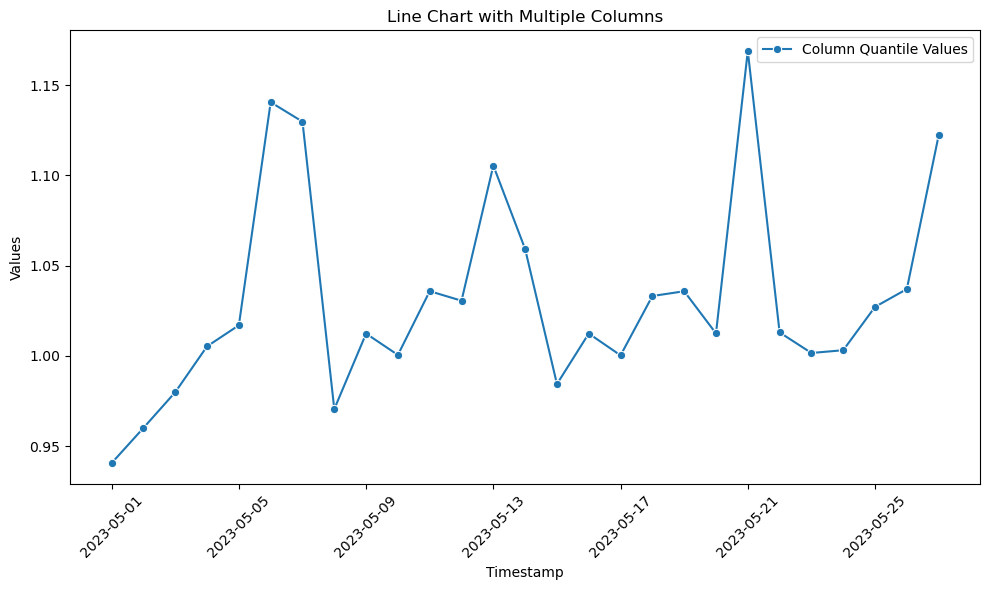

In [33]:
# Convert the 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create a line chart using matplotlib
plt.figure(figsize=(10, 6))

sns.lineplot(x='timestamp', y='column_quantile_values', data=data, marker='o', label='Column Quantile Values')
# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Line Chart with Multiple Columns')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# End of The Project: Part 5